In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.shape

(42, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

## Creating dummy data

In [7]:
quarter=['Q1','Q2','Q3','Q4']
n=df['Quarter'][0]
n[0:2]
df['quarter']=0
for i in range(42):
    n=df['Quarter'][i]
    df['quarter'][i]=n[0:2]
dummy=pd.DataFrame(pd.get_dummies(df['quarter']))
df1=pd.concat((df,dummy),axis=1)

In [8]:
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [9]:
df1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [10]:
t = np.arange(1,43)
df1['t']=t
df1['t_square']=df1['t']*df1['t']
log_Sales=np.log(df1['Sales'])
df1['log_Sales']=log_Sales
df1.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


## Visualization

<Axes: >

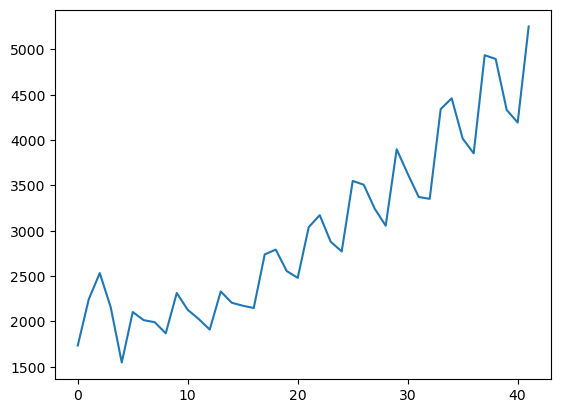

In [11]:
df1.Sales.plot()

<Axes: xlabel='quarter', ylabel='Sales'>

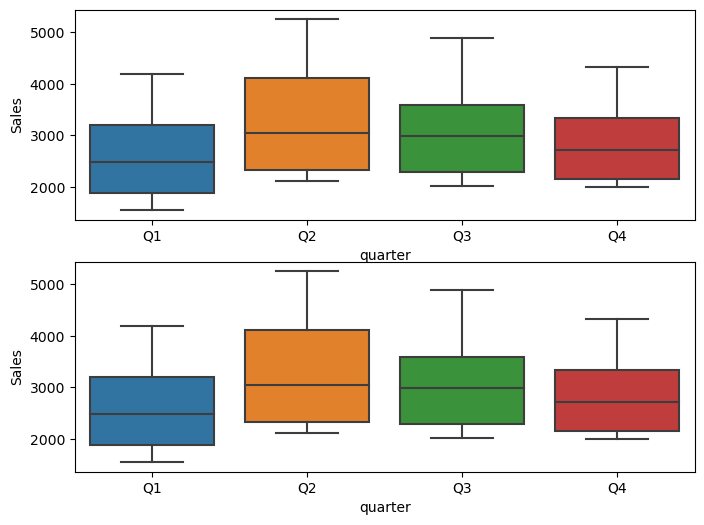

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=df)
plt.subplot(212)
sns.boxplot(x="quarter",y="Sales",data=df)

<Axes: ylabel='quarter'>

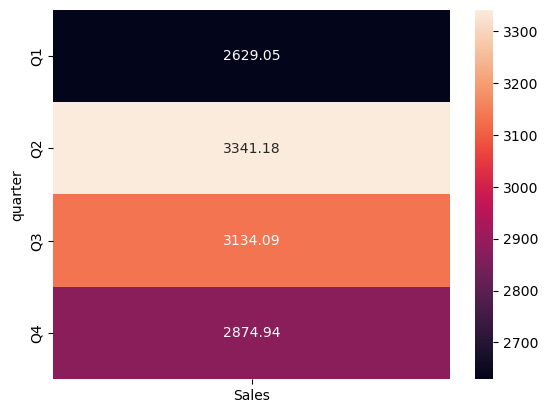

In [13]:
heatmap_y_month = pd.pivot_table(data=df1,values="Sales",index="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

## Splitting the data

In [14]:
Train=df1.head(38)
Test=df1.tail(4)

In [15]:
Train.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [16]:
Test.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


## Building the model

In [17]:
# Linear
linear= smf.ols('Sales~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022813

In [18]:
# Quadratic
quad=smf.ols('Sales~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predquad))**2))
rmsequad

475.56183518315095

In [19]:
# Exponential
expo=smf.ols('log_Sales~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672346

In [20]:
# Additive
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=Train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547283

In [21]:
# Additive Linear
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.98290239822427

In [22]:
# Additive Quadratic
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(Test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719352977

In [23]:
# Multiplicative Seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779709

In [24]:
# Multiplicative Inverse
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.5243904982721

In [25]:
# Multiplicative Quadratic
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187971785

In [26]:
Table={'Model':pd.Series(['rmselin','rmsequad','rmseexpo','rmseadd','rmseaddlinear','rmseaddquad','rmsemul','rmsemulin','rmse_mul_quad']),
       'RMSE_Values':pd.Series([rmselin,rmsequad,rmseexpo,rmseadd,rmseaddlinear,rmseaddquad,rmsemul,rmsemulin,rmse_mul_quad])}
RMSE_Table=pd.DataFrame(Table)
RMSE_Table.sort_values(['RMSE_Values'])

,Model,RMSE_Values
7,rmsemulin,225.524390
5,rmseaddquad,301.738007
0,rmselin,421.178788
4,rmseaddlinear,464.982902
2,rmseexpo,466.247973
1,rmsequad,475.561835
8,rmse_mul_quad,581.845719
3,rmseadd,1860.023815
6,rmsemul,1963.389640


## Prediction

In [27]:
final_pred= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=df1).fit()
pred_new = pd.Series(mullin.predict(df1))
pred_new.head()

0    7.345823
1    7.587884
2    7.574280
3    7.498859
4    7.440236
dtype: float64

In [28]:
df1["forecasted_Sales"] = np.exp(pd.Series(pred_new))
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1549.709886
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,1974.131516
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,1947.457062
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1805.980615
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1703.152319
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2169.597484
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2140.281894
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1984.797349
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1871.787647
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2384.417251


# The best model is Multiplicative Inverse